In [1]:
from data_gen import *
from experiment import *
from ad_learning import *
from ad_neural import *

## Continuous outcome

In [2]:

# poly = Gate layer에서 poly term 추가할 건지
# smooth = 시나리오2,3 => 시나리오 4,5
# k_active = 남길 신호변수 개
if __name__ == "__main__":
    results = run_experiments(K=4, p=10, n=2000, n_test=10000, n_repeats=20,
                               epochs=60, warmup_epochs=40, lr=1e-3, smooth=True, hidden=[128,128], 
                               k_active=10, poly=False)
    for scen, res in results.items():
        print("\n" + "="*10, f"Scenario {scen}", "="*10)
        for model_name, stats in res.items():
            print(f"{model_name:7s} | "
                  f"Error mean={stats['Error_mean']:.3f}, var={stats['Error_var']:.4f} | "
                  f"Value mean={stats['Value_mean']:.3f}, var={stats['Value_var']:.4f}")

[Scenario 1] Repeat 1/20
[ep 10] warmup, loss=6.6948
[ep 20] warmup, loss=6.3638
[ep 30] warmup, loss=6.0158
[ep 40] warmup, loss=5.8090
==> warm-up done, gate ON, k_active=10, init topk=[2 1 3 5 7 0 6 8 9 4]
[ep 50] loss=5.7103, active_idx=[0 1 2 3 4 5 6 7 8 9]
[ep 60] loss=5.6026, active_idx=[0 1 2 3 4 5 6 7 8 9]
[Scenario 1] Repeat 2/20
[ep 10] warmup, loss=6.6059
[ep 20] warmup, loss=6.2545
[ep 30] warmup, loss=5.8782
[ep 40] warmup, loss=5.6499
==> warm-up done, gate ON, k_active=10, init topk=[0 2 3 7 1 6 8 4 5 9]
[ep 50] loss=5.5559, active_idx=[0 1 2 3 4 5 6 7 8 9]
[ep 60] loss=5.4559, active_idx=[0 1 2 3 4 5 6 7 8 9]
[Scenario 1] Repeat 3/20
[ep 10] warmup, loss=6.6065
[ep 20] warmup, loss=6.2280
[ep 30] warmup, loss=5.8639
[ep 40] warmup, loss=5.6812
==> warm-up done, gate ON, k_active=10, init topk=[3 0 2 1 7 5 6 9 8 4]
[ep 50] loss=5.5749, active_idx=[0 1 2 3 4 5 6 7 8 9]
[ep 60] loss=5.4545, active_idx=[0 1 2 3 4 5 6 7 8 9]
[Scenario 1] Repeat 4/20
[ep 10] warmup, loss=6.8

## Survival outcome

In [ ]:
if __name__ == "__main__":
    res_surv = run_experiments_survival(
        K=4, p=40, n=2000, n_test=10000,
        n_repeats=20, epochs=60, lr=1e-3, warmup_epochs=40,
        lam=0.05, step=1e-2,
        smooth=False, theta_cens=50.0, k_active=10, poly=True
    )

    for scen, res in res_surv.items():
        print("\n" + "="*10, f"Scenario {scen}", "="*10)
        for model_name, stats in res.items():
            print(f"{model_name:7s} | "
                  f"Error mean={stats['Error_mean']:.3f}, var={stats['Error_var']:.4f} | "
                  f"Value mean={stats['Value_mean']:.3f}, var={stats['Value_var']:.4f}")


[Scenario 1] Repeat 1/20
[Surv-NN] warmup ep 10/60 loss=20.3419
[Surv-NN] warmup ep 20/60 loss=20.0380
[Surv-NN] warmup ep 30/60 loss=19.6157
[Surv-NN] warmup ep 40/60 loss=19.1808
==> Warm-up done. Gate ON with k=10. initial topk=[ 2  0  1  3 11  5 27 38 14 39]
[Surv-NN] ep 50/60 loss=19.3845, active_idx=[ 0  1  2  3  5 11 14 27 38 39]
[Surv-NN] ep 60/60 loss=19.3099, active_idx=[ 0  1  2  3  5 11 14 27 38 39]
[Scenario 1] Repeat 2/20
[Surv-NN] warmup ep 10/60 loss=20.7604
[Surv-NN] warmup ep 20/60 loss=20.4710
[Surv-NN] warmup ep 30/60 loss=20.0772
[Surv-NN] warmup ep 40/60 loss=19.6737
==> Warm-up done. Gate ON with k=10. initial topk=[ 2  3  1  0 33 21 36 16 11  7]
[Surv-NN] ep 50/60 loss=19.8465, active_idx=[ 0  1  2  3  7 11 16 21 33 36]
[Surv-NN] ep 60/60 loss=19.7576, active_idx=[ 0  1  2  3  7 11 16 21 33 36]
[Scenario 1] Repeat 3/20
[Surv-NN] warmup ep 10/60 loss=20.4503
[Surv-NN] warmup ep 20/60 loss=20.2500
[Surv-NN] warmup ep 30/60 loss=19.9292
[Surv-NN] warmup ep 40/60 lo

In [4]:
if __name__ == "__main__":

    p_list = [800]
    n_list = [800, 2000]
    smooth_list = [False, True]

    total_cases = len(p_list) * len(n_list) * len(smooth_list)
    case_id = 1

    for p in p_list:
        for n in n_list:
            for smooth in smooth_list:



                res_surv = run_experiments_survival(
                    K=4,
                    p=p,
                    n=n,
                    n_test=10000,
                    n_repeats=20,
                    epochs=60,
                    lr=1e-3,
                    warmup_epochs=40,
                    lam=0.05,
                    step=1e-2,
                    smooth=smooth,
                    theta_cens=50.0,
                    k_active=10,
                    poly=False
                )

                # --- 결과 출력 ---
                print("\n" + "#" * 60)
                print(f"Case {case_id}/{total_cases}")
                print(f"p={p}, n={n}, smooth={smooth}")
                print("#" * 60)
                for scen, res in res_surv.items():
                    print("\n" + "="*12, f"Scenario {scen}", "="*12)
                    for model_name, stats in res.items():
                        print(f"{model_name:7s} | "
                              f"Error mean={stats['Error_mean']:.3f}, var={stats['Error_var']:.4f} | "
                              f"Value mean={stats['Value_mean']:.3f}, var={stats['Value_var']:.4f}")

                case_id += 1

    print("\nAll experiments finished.")


[Scenario 1] Repeat 1/20
[Surv-NN] warmup ep 10/60 loss=16.7357
[Surv-NN] warmup ep 20/60 loss=14.9880
[Surv-NN] warmup ep 30/60 loss=12.7095
[Surv-NN] warmup ep 40/60 loss=10.5882
==> Warm-up done. Gate ON with k=10. initial topk=[  3   1 313   2   5 682 433   0 599 704]
[Surv-NN] ep 50/60 loss=16.5624, active_idx=[  0   1   2   3   5 313 433 599 682 704]
[Surv-NN] ep 60/60 loss=16.3372, active_idx=[  0   1   2   3   5 313 433 599 682 704]
[Scenario 1] Repeat 2/20
[Surv-NN] warmup ep 10/60 loss=17.0014
[Surv-NN] warmup ep 20/60 loss=15.3578
[Surv-NN] warmup ep 30/60 loss=13.2419
[Surv-NN] warmup ep 40/60 loss=11.1152
==> Warm-up done. Gate ON with k=10. initial topk=[  3   2 629 139 172 725 158  82 566 388]
[Surv-NN] ep 50/60 loss=17.2687, active_idx=[  2   3  82 139 158 172 388 566 629 725]
[Surv-NN] ep 60/60 loss=17.1594, active_idx=[  2   3  82 139 158 172 388 566 629 725]
[Scenario 1] Repeat 3/20
[Surv-NN] warmup ep 10/60 loss=16.9999
[Surv-NN] warmup ep 20/60 loss=15.3445
[Surv-N

## data eda


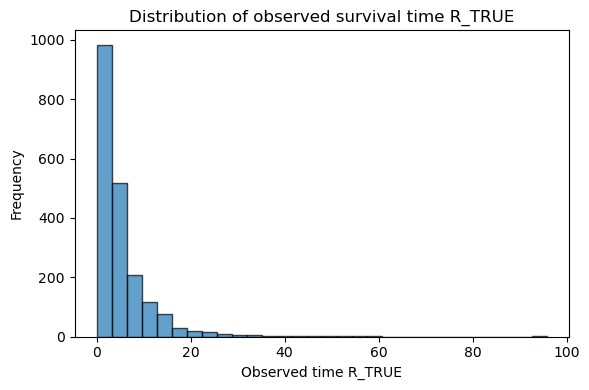

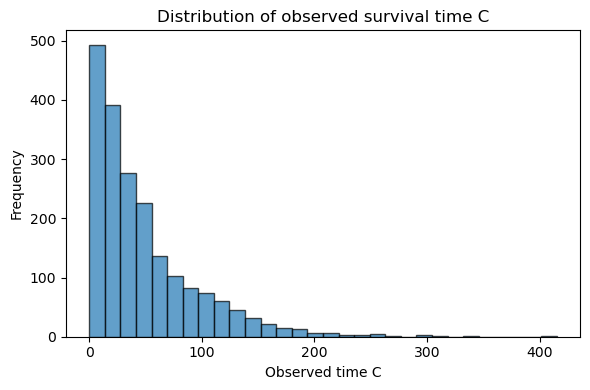

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 예시: 시뮬레이션 한 번 돌리기
K = 4
X, A, T, Delta, true_opt, R_true, C = simulate_data_surv(
    K=K, n=2000, p=10, scenario=3, seed=0, smooth=False
)

def print_survival_summary(R_true, C, T, Delta):
    def summary_stats(name, arr):
        print(f"\n--- {name} ---")
        print(f"n = {len(arr)}")
        print(f"mean       = {np.mean(arr):.4f}")
        print(f"median     = {np.median(arr):.4f}")
        print(f"25% quant  = {np.quantile(arr, 0.25):.4f}")
        print(f"50% quant  = {np.quantile(arr, 0.50):.4f}")
        print(f"75% quant  = {np.quantile(arr, 0.75):.4f}")
        print(f"min        = {np.min(arr):.4f}")
        print(f"max        = {np.max(arr):.4f}")

    print("========== Survival Data Summary ==========")

    summary_stats("True event time (R_true)", R_true)
    summary_stats("Censoring time (C)", C)
    summary_stats("Observed time (T = min(R_true, C))", T)

    # Delta: event indicator
    print("\n--- Delta (event observed) ---")
    print(f"event rate    = {np.mean(Delta):.4f}")
    print(f"censoring rate= {1-np.mean(Delta):.4f}")


plt.figure(figsize=(6,4))
plt.hist(R_true, bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Observed time R_TRUE")
plt.ylabel("Frequency")
plt.title("Distribution of observed survival time R_TRUE")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.hist(C, bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Observed time C")
plt.ylabel("Frequency")
plt.title("Distribution of observed survival time C")
plt.tight_layout()
plt.show()

In [ ]:
print_survival_summary(R_true, C, T, Delta)


========== Survival Data Summary ==========

--- True event time (R_true) ---
n = 2000
mean       = 5.4864
median     = 3.3902
25% quant  = 1.7290
50% quant  = 3.3902
75% quant  = 6.4983
min        = 0.1174
max        = 95.7618

--- Censoring time (C) ---
n = 2000
mean       = 48.2208
median     = 32.8106
25% quant  = 14.2223
50% quant  = 32.8106
75% quant  = 66.1711
min        = 0.0323
max        = 415.1387

--- Observed time (T = min(R_true, C)) ---
n = 2000
mean       = 4.7941
median     = 3.0951
25% quant  = 1.6141
50% quant  = 3.0951
75% quant  = 5.8836
min        = 0.0323
max        = 55.0395

--- Delta (event observed) ---
event rate    = 0.8930
censoring rate= 0.1070
